# COVID-19 Growth By State (US)
> Growth of COVID-19 for the US by State.

- comments: true
- author: Avy Faingezicht
- categories: [growth, US, states]
- image: images/covid-growth-states.png
- permalink: /growth-us-states/

In [1]:
#hide
%matplotlib inline
import math
import requests
import pandas as pd
import numpy as np
from cycler import cycler
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

states_url = "https://covidtracking.com/api/states/daily"
us_url = "https://covidtracking.com/api/us/daily"
case_threshold = 100

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
default_cycler = cycler(linestyle=['-', '--', ':', '-.']) * cycler(color=colors)

r = requests.get(states_url)
states_df = pd.DataFrame(r.json())
states_df['date'] = pd.to_datetime(states_df.date, format="%Y%m%d")
states_df = states_df[['date', 'state', 'positive', 'death']].sort_values('date')
cols = {}
for state in states_df.state.unique():
    cases = states_df[(states_df.state == state) & (states_df.positive > case_threshold)]
    cases = cases.reset_index().positive.reset_index(drop=True)
    if len(cases) > 1:
        cols[state] = cases
        
r = requests.get(us_url)
us_df = pd.DataFrame(r.json())
us_df['date'] = pd.to_datetime(us_df.date, format="%Y%m%d")
us_df = us_df[['date', 'positive', 'death']].sort_values('date')
cols['US'] = us_df.positive.reset_index(drop=True)

In [2]:
#hide
populations = {
    # Taken from US Census Bureau NST-EST2019-01: Table 1. Annual Estimates of the Resident Population 
    # for the United States, Regions, States, and Puerto Rico: April 1, 2010 to July 1, 2019
    # https://www.census.gov/newsroom/press-kits/2019/national-state-estimates.html
    "AL": 4903185,
    "AK": 731545,
    "AZ": 7278717,
    "AR": 3017804,
    "CA": 39512223,
    "CO": 5758736,
    "CT": 3565287,
    "DE": 973764,
    "DC": 705749,
    "FL": 21477737,
    "GA": 10617423,
    "HI": 1415872,
    "ID": 1787065,
    "IL": 12671821,
    "IN": 6732219,
    "IA": 3155070,
    "KS": 2913314,
    "KY": 4467673,
    "LA": 4648794,
    "ME": 1344212,
    "MD": 6045680,
    "MA": 6892503,
    "MI": 9986857,
    "MN": 5639632,
    "MS": 2976149,
    "MO": 6137428,
    "MT": 1068778,
    "NE": 1934408,
    "NV": 3080156,
    "NH": 1359711,
    "NJ": 8882190,
    "NM": 2096829,
    "NY": 19453561,
    "NC": 10488084,
    "ND": 762062,
    "OH": 11689100,
    "OK": 3956971,
    "OR": 4217737,
    "PA": 12801989,
    "RI": 1059361,
    "SC": 5148714,
    "SD": 884659,
    "TN": 6829174,
    "TX": 28995881,
    "UT": 3205958,
    "VT": 623989,
    "VA": 8535519,
    "WA": 7614893,
    "WV": 1792147,
    "WI": 5822434,
    "WY": 578759,
    "PR": 3193694,
    "GU": 165_718,
    "VI": 104_914,
    "AS": 55_641,
    "MP": 55_194,
}

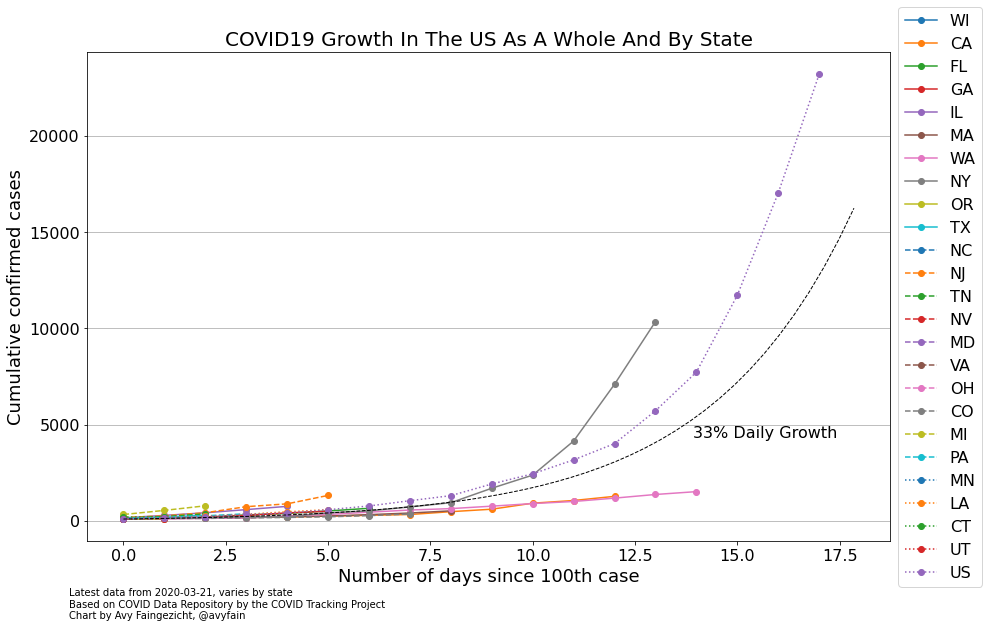

In [3]:
#collapse-hide
fig = plt.figure(figsize=(16, 9))
ax = plt.axes()
ax.set_prop_cycle(default_cycler)
pd.concat(cols, axis=1).plot(ax=ax, marker='o')

plt.title('COVID19 Growth In The US As A Whole And By State', fontsize=BIGGER_SIZE)
plt.ylabel('Cumulative confirmed cases')
plt.xlabel(f'Number of days since {case_threshold}th case')
plt.annotate(f'Latest data from {states_df.date.max().strftime("%Y-%m-%d")}, varies by state\n'
             'Based on COVID Data Repository by the COVID Tracking Project\n'
             'Chart by Avy Faingezicht, @avyfain', 
             (0.07, 0.01), xycoords='figure fraction', fontsize=10);

box = ax.get_position()

ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

x = np.linspace(0, plt.xlim()[1])
plt.plot(x, 100 * (1.33) ** x, ls='--', color='k', label='33% daily growth', linewidth=1)
plt.annotate('33% Daily Growth', 
             (0.7, 0.3), xycoords='figure fraction', fontsize=SMALL_SIZE);

plt.grid(axis='y')
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_formatter(formatter)

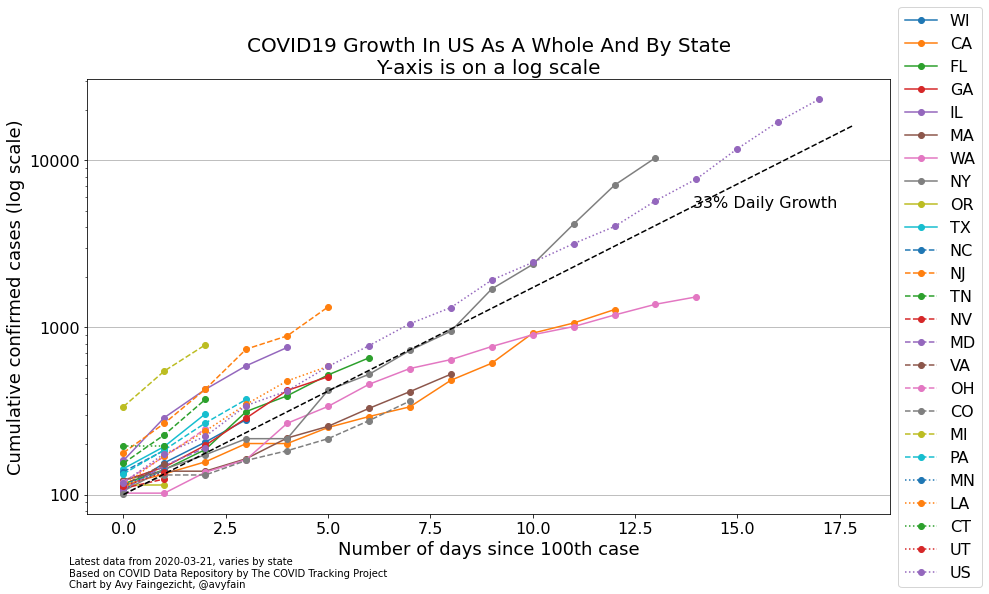

In [4]:
#collapse-hide
fig = plt.figure(figsize=(16, 8))
ax = plt.axes()
ax.set_prop_cycle(default_cycler)
pd.concat(cols, axis=1).plot(ax=ax, marker='o', logy=True)

plt.title('COVID19 Growth In US As A Whole And By State\nY-axis is on a log scale', fontsize=BIGGER_SIZE)
plt.ylabel('Cumulative confirmed cases (log scale)')
plt.xlabel(f'Number of days since {case_threshold}th case')
plt.annotate(f'Latest data from {states_df.date.max().strftime("%Y-%m-%d")}, varies by state\n'
             'Based on COVID Data Repository by The COVID Tracking Project\n'
             'Chart by Avy Faingezicht, @avyfain', 
             (0.07, .01), xycoords='figure fraction', fontsize=10);

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot(x, 100 * (1.33) ** x, ls='--', color='k', label='33% daily growth')
plt.annotate('33% Daily Growth', 
             (0.7, 0.65), xycoords='figure fraction', fontsize=SMALL_SIZE);
plt.grid(axis='y')
ax.yaxis.set_major_formatter(formatter)

In [5]:
#hide
fig.savefig('../images/covid-growth-states.png')

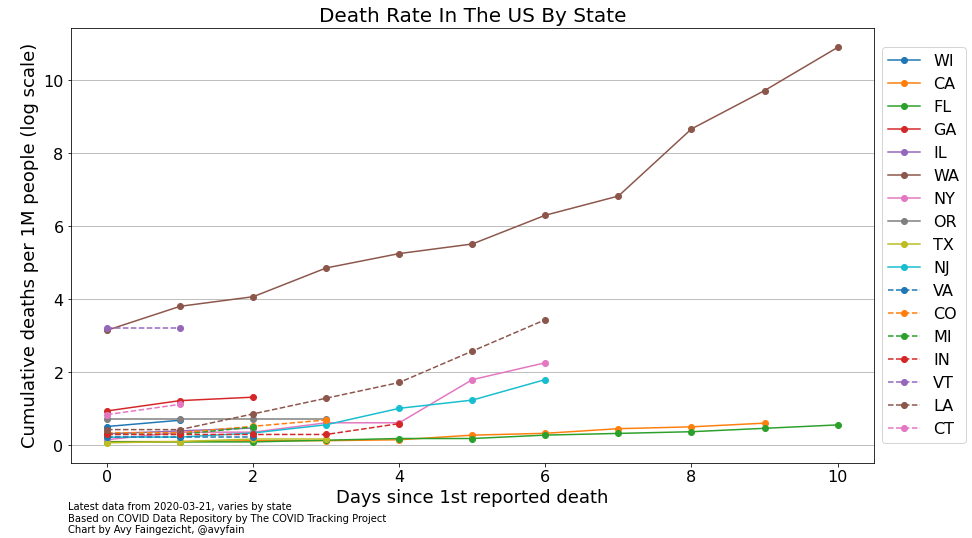

In [6]:
#collapse-hide

# re-using the df's from above
death_threshold = 1
cols = {}

states_df['population'] = states_df['state'].map(populations)
states_df['deaths_per_m'] = states_df.death / (states_df.population / 1_000_000)

for state in states_df.state.unique():
    deaths = states_df[(states_df.state == state) & (states_df.death > death_threshold)]
    deaths = deaths.reset_index().deaths_per_m
    if len(deaths) > 1:
        cols[state] = deaths

fig = plt.figure(figsize=(16, 8))
ax = plt.axes()
ax.set_prop_cycle(default_cycler)
pd.concat(cols, axis=1).plot(ax=ax, marker='o')#, logy=True)
plt.grid(axis='y')
plt.title('Death Rate In The US By State', fontsize=BIGGER_SIZE)
plt.ylabel('Cumulative deaths per 1M people (log scale)')
plt.xlabel(f'Days since {death_threshold}st reported death')
plt.annotate(f'Latest data from {states_df.date.max().strftime("%Y-%m-%d")}, varies by state\n'
             'Based on COVID Data Repository by The COVID Tracking Project\n'
             'Chart by Avy Faingezicht, @avyfain', 
             (0.07, .01), xycoords='figure fraction', fontsize=10);

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.yaxis.set_major_formatter(formatter)

In [7]:
#hide
fig.savefig('../images/covid-death-rate-states.png')

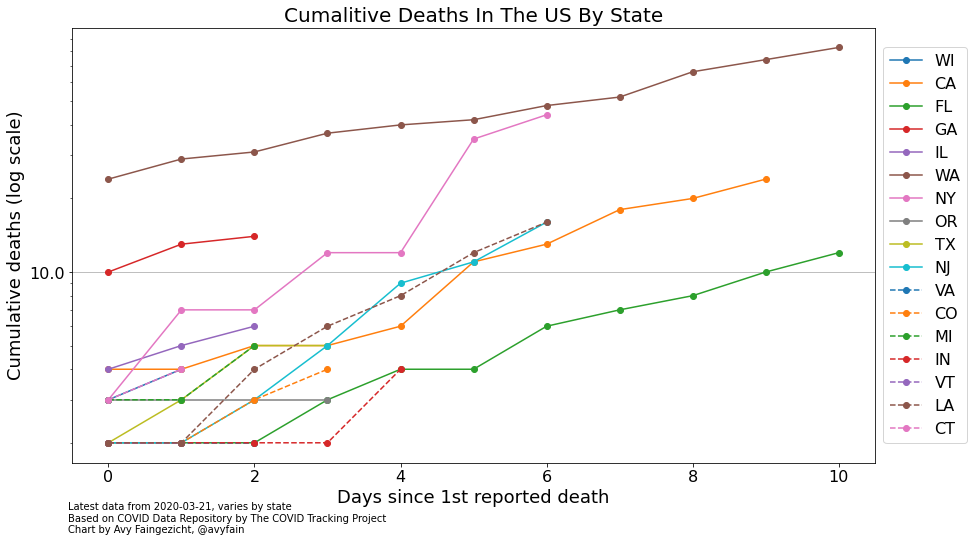

In [8]:
#collapse-hide

# re-using the df's from above
death_threshold = 1
cols = {}

for state in states_df.state.unique():
    deaths = states_df[(states_df.state == state) & (states_df.death > death_threshold)]
    deaths = deaths.reset_index().death
    if len(deaths) > 1:
        cols[state] = deaths

fig = plt.figure(figsize=(16, 8))
ax = plt.axes()
ax.set_prop_cycle(default_cycler)

pd.concat(cols, axis=1).plot(ax=ax, marker='o', logy=True)
plt.grid(axis='y')
plt.title('Cumalitive Deaths In The US By State', fontsize=BIGGER_SIZE)
plt.ylabel('Cumulative deaths (log scale)')
plt.xlabel(f'Days since {death_threshold}st reported death')
plt.annotate(f'Latest data from {states_df.date.max().strftime("%Y-%m-%d")}, varies by state\n'
             'Based on COVID Data Repository by The COVID Tracking Project\n'
             'Chart by Avy Faingezicht, @avyfain', 
             (0.07, .01), xycoords='figure fraction', fontsize=10);

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.yaxis.set_major_formatter(formatter)

This visualization was made by [Avy Faingezicht](https://twitter.com/avyfain)[^1].

[^1]:  Data sourced from ["The COVID Tracking Project"](https://covidtracking.com/). Link to [original notebook](https://github.com/avyfain/covid19/blob/master/covid19.ipynb).  Updated hourly by [GitHub Actions](https://github.com/features/actions).